In [0]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [0]:
df_nebula = pd.read_csv('/Workspace/Users/gabriel07arthur@gmail.com/projeto_ebac/projeto_vendas/arquivos_vendas/Equipe_Nebula.csv')
df_orion = pd.read_csv('/Workspace/Users/gabriel07arthur@gmail.com/projeto_ebac/projeto_vendas/arquivos_vendas/Equipe_Orion.csv')
df_solaris = pd.read_csv('/Workspace/Users/gabriel07arthur@gmail.com/projeto_ebac/projeto_vendas/arquivos_vendas/Equipe_Solaris.csv')
df_vega= pd.read_csv('/Workspace/Users/gabriel07arthur@gmail.com/projeto_ebac/projeto_vendas/arquivos_vendas/Equipe_Vega.csv')
df_zenith = pd.read_csv('/Workspace/Users/gabriel07arthur@gmail.com/projeto_ebac/projeto_vendas/arquivos_vendas/Equipe_Zenith.csv')
df_relatorio = pd.read_csv('/Workspace/Users/gabriel07arthur@gmail.com/projeto_ebac/projeto_vendas/arquivos_vendas/relatorio_final.csv')

In [0]:
# Informações gerais
print("=== INFORMAÇÕES DO DATASET ===")
print("=== EQUIPE NEBULA ===")
print(df_nebula.info())
print("=== EQUIPE ORION ===")
print(df_orion.info())
print("=== EQUIPE SOLARIS ===")
print(df_solaris.info())
print("=== EQUIPE VEGA ===")
print(df_vega.info())
print("=== EQUIPE ZENITH ===")
print(df_zenith.info())
print("=== RELATÓRIO ===")
print(df_relatorio.info())

print("\n=== VALORES AUSENTES ===")
print("=== EQUIPE NEBULA ===")
print(df_nebula.isnull().sum())
print("=== EQUIPE ORION ===")
print(df_orion.isnull().sum())
print("=== EQUIPE SOLARIS ===")
print(df_solaris.isnull().sum())
print("=== EQUIPE VEGA ===")
print(df_vega.isnull().sum())
print("=== EQUIPE ZENITH ===")
print(df_zenith.isnull().sum())
print("=== RELATÓRIO ===")
print(df_relatorio.isnull().sum())


=== INFORMAÇÕES DO DATASET ===
=== EQUIPE NEBULA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23012 entries, 0 to 23011
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 23012 non-null  int64  
 1   data_venda         23012 non-null  object 
 2   vendedor           23012 non-null  object 
 3   equipe             23012 non-null  object 
 4   categoria_servico  23012 non-null  object 
 5   servico            23012 non-null  object 
 6   quantidade         23012 non-null  int64  
 7   preco_unitario     23012 non-null  float64
 8   custo              23012 non-null  float64
 9   cliente            23012 non-null  object 
 10  estado             23012 non-null  object 
 11  regiao             23012 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 2.1+ MB
None
=== EQUIPE ORION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21745 entries, 0 to 21744
Da

In [0]:
# Juntar tudo
df_tudo = pd.concat([df_nebula, df_orion, df_solaris, df_vega, df_zenith, df_relatorio], ignore_index=True)


print(f"Total: {len(df_tudo)} vendas")
print("=== INFORMAÇÕES DO DATASET ===")
print(df_tudo.info())
print("\n=== VALORES AUSENTES ===")
print(df_tudo.isnull().sum())

Total: 234170 vendas
=== INFORMAÇÕES DO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234170 entries, 0 to 234169
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 234170 non-null  int64  
 1   data_venda         234170 non-null  object 
 2   vendedor           234170 non-null  object 
 3   equipe             234170 non-null  object 
 4   categoria_servico  234170 non-null  object 
 5   servico            234170 non-null  object 
 6   quantidade         234170 non-null  int64  
 7   preco_unitario     234170 non-null  float64
 8   custo              234170 non-null  float64
 9   cliente            234170 non-null  object 
 10  estado             234170 non-null  object 
 11  regiao             234170 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 21.4+ MB
None

=== VALORES AUSENTES ===
Id                   0
data_venda           0
vendedor   

In [0]:
# data_venda formato data
df_tudo['data_venda'] = pd.to_datetime(df_tudo['data_venda'])


In [0]:
print("=== INFORMAÇÕES DO DATASET ===")
print("=== EQUIPES ===")
print(df_tudo.info())

=== INFORMAÇÕES DO DATASET ===
=== EQUIPE NEBULA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234170 entries, 0 to 234169
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Id                 234170 non-null  int64         
 1   data_venda         234170 non-null  datetime64[ns]
 2   vendedor           234170 non-null  object        
 3   equipe             234170 non-null  object        
 4   categoria_servico  234170 non-null  object        
 5   servico            234170 non-null  object        
 6   quantidade         234170 non-null  int64         
 7   preco_unitario     234170 non-null  float64       
 8   custo              234170 non-null  float64       
 9   cliente            234170 non-null  object        
 10  estado             234170 non-null  object        
 11  regiao             234170 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), obj

In [0]:
# Criando novas colunas

# 1. Margem de lucro (em valor e percentual)

df_tudo['valor_total'] = df_tudo['preco_unitario'] * df_tudo['quantidade']
df_tudo['lucro'] = (df_tudo['valor_total'] - df_tudo['custo']).round(2)
df_tudo['margem_percentual'] = ((df_tudo['lucro'] / df_tudo['valor_total']) * 100).round(2)

# 2. Extraindo informações da data
df_tudo['mes'] = df_tudo['data_venda'].dt.month
df_tudo['trimestre'] = df_tudo['data_venda'].dt.quarter
df_tudo['ano'] = df_tudo['data_venda'].dt.year

# 3. Classificação de tamanho de venda
df_tudo['tamanho_venda'] = pd.cut(df_tudo['valor_total'],
                                   bins=[0, 10000, 25000, 50000],
                                   labels=['Pequena', 'Média', 'Grande'])

# 4. Indicador de eficiência
df_tudo['eficiencia'] = df_tudo['lucro'] / df_tudo['custo']


print("\n=== NOVAS COLUNAS CRIADAS ===")
print(df_tudo[['lucro', 'margem_percentual', 'mes', 'trimestre', 'ano', 'tamanho_venda', 'eficiencia']].head())



=== NOVAS COLUNAS CRIADAS ===
      lucro  margem_percentual  mes  trimestre   ano tamanho_venda  eficiencia
0    399.03              30.00    8          3  2022       Pequena    0.428585
1   4798.88              83.52   10          4  2023       Pequena    5.066278
2   1974.26              82.04    9          3  2023       Pequena    4.566769
3   2963.68              90.98    4          2  2025       Pequena   10.083974
4  11166.35              95.57   11          4  2024         Média   21.588334


In [0]:
# Verificação final
print("=== VERIFICAÇÃO FINAL ===")
print(f"Dimensões do dataset limpo: {df_tudo.shape}")
print(f"\nTipos de dados:")
print(df_tudo.dtypes)
print(f"\nValores ausentes totais: {df_tudo.isnull().sum().sum()}")
print(f"\nValores únicos: {df_tudo.nunique()}")


=== VERIFICAÇÃO FINAL ===
Dimensões do dataset limpo: (234170, 20)

Tipos de dados:
Id                            int64
data_venda           datetime64[ns]
vendedor                     object
equipe                       object
categoria_servico            object
servico                      object
quantidade                    int64
preco_unitario              float64
custo                       float64
cliente                      object
estado                       object
regiao                       object
valor_total                 float64
lucro                       float64
margem_percentual           float64
mes                           int32
trimestre                     int32
ano                           int32
tamanho_venda              category
eficiencia                  float64
dtype: object

Valores ausentes totais: 0

Valores únicos: Id                    25130
data_venda             1096
vendedor                 24
equipe                    5
categoria_servico        

In [0]:
df_spark_tudo = spark.createDataFrame(df_tudo)
df_spark_tudo.createOrReplaceTempView("df_spark_tudo")

In [0]:
display(df_spark_tudo)

Id data_venda vendedor equipe categoria_servico servico quantidade preco_unitario custo cliente estado regiao valor_total lucro margem_percentual mes trimestre ano tamanho_venda eficiencia 1 2022-08-04T00:00:00.000Z Sarah Equipe Nebula Infraestrutura Backup em Nuvem 1 1330.07 931.04 Viana DF centro-oeste 1330.07 399.03 30.0 8 3 2022 Pequena 0.42858523801340437 2 2023-10-15T00:00:00.000Z Benício Equipe Nebula Consultoria Auditoria de Sistemas 5 1149.22 947.22 Moreira S.A. AM norte 5746.1 4798.88 83.52 10 4 2023 Pequena 5.06627816135639 3 2023-09-12T00:00:00.000Z Benício Equipe Nebula Consultoria Consultoria em TI 3 802.19 432.31 Rodrigues - ME BA nordeste 2406.57 1974.2600000000002 82.04 9 3 2023 Pequena 4.566769216534432 4 2025-04-06T00:00:00.000Z Renan Equipe Nebula Desenvolvimento Automação de Processos 6 542.93 293.9 Duarte Moreira S/A AM norte 3257.58 2963.68 90.98 4 2 2025 Pequena 10.083974140864239 5 2024-11-23T00:00:00.000Z Renan Equipe Nebula Consultoria Treinamento em TI 17 687.27 517.24 da Rosa RJ sudeste 11683.59 11166.35 95.57 11 4 2024 Média 21.588334235557962 6 2022-09-06T00:00:00.000Z Vinicius Equipe Nebula Desenvolvimento Integração de Sistemas 16 326.51 274.6 Fogaça PE nordeste 5224.16 4949.5599999999995 94.74 9 3 2022 Pequena 18.024617625637287 7 2023-11-29T00:00:00.000Z Julia Equipe Nebula Consultoria Consultoria em TI 11 543.97 293.23 Freitas PA norte 5983.67 5690.4400000000005 95.1 11 4 2023 Pequena 19.40606349964192 8 2024-11-17T00:00:00.000Z Renan Equipe Nebula Consultoria Planejamento Estratégico de TI 3 764.04 602.16 Moura Costela - EI GO centro-oeste 2292.12 1689.96 73.73 11 4 2024 Pequena 2.8064966121960944 9 2023-02-11T00:00:00.000Z Julia Equipe Nebula Desenvolvimento Criação de Aplicativos 17 773.3 428.21 Lopes BA nordeste 13146.099999999999 12717.89 96.74 2 1 2023 Média 29.700123771046915 10 2024-08-31T00:00:00.000Z Julia Equipe Nebula Consultoria Auditoria de Sistemas 8 200.68 137.61 Oliveira MT centro-oeste 1605.44 1467.83 91.43 8 3 2024 Pequena 10.666593997529247 11 2024-12-19T00:00:00.000Z Renan Equipe Nebula Consultoria Treinamento em TI 18 1077.9 810.03 Ferreira RS sul 19402.2 18592.170000000002 95.83 12 4 2024 Média 22.952446205696088 12 2024-01-29T00:00:00.000Z Benício Equipe Nebula Infraestrutura Monitoramento de Sistemas 15 901.74 590.79 da Cruz Cavalcanti - EI RO norte 13526.1 12935.310000000001 95.63 1 1 2024 Média 21.894937287360996 13 2023-09-26T00:00:00.000Z Renan Equipe Nebula Consultoria Planejamento Estratégico de TI 3 304.03 259.64 Gonçalves Moraes - EI SP sudeste 912.0899999999999 652.4499999999999 71.53 9 3 2023 Pequena 2.512902480357418 14 2022-10-02T00:00:00.000Z Renan Equipe Nebula Consultoria Treinamento em TI 10 1138.06 779.69 Costela DF centro-oeste 11380.599999999999 10600.909999999998 93.15 10 4 2022 Média 13.596313919634722 15 2023-07-26T00:00:00.000Z Vinicius Equipe Nebula Desenvolvimento Integração de Sistemas 14 385.53 238.39 Silva SP sudeste 5397.42 5159.03 95.58 7 3 2023 Pequena 21.6411342757666 16 2023-07-28T00:00:00.000Z Renan Equipe Nebula Consultoria Treinamento em TI 12 1293.88 960.06 Araújo BA nordeste 15526.560000000001 14566.500000000002 93.82 7 3 2023 Média 15.172489219423788 17 2025-04-17T00:00:00.000Z Vinicius Equipe Nebula Infraestrutura Backup em Nuvem 7 918.39 810.65 da Rocha Carvalho - ME RO norte 6428.73 5618.08 87.39 4 2 2025 Pequena 6.930339850737063 18 2022-11-05T00:00:00.000Z Benício Equipe Nebula Desenvolvimento Automação de Processos 11 165.17 130.58 Viana S.A. RO norte 1816.87 1686.29 92.81 11 4 2022 Pequena 12.913845918211058 19 2024-12-27T00:00:00.000Z Benício Equipe Nebula Consultoria Treinamento em TI 18 1316.98 738.25 Lima Ltda. AM norte 23705.64 22967.39 96.89 12 4 2024 Média 31.110585844903486 20 2025-02-24T00:00:00.000Z Vinicius Equipe Nebula Desenvolvimento Criação de Aplicativos 3 950.59 648.58 da Costa BA nordeste 2851.77 2203.19 77.26 2 1 2025 Pequena 3.3969440932498687 21 2024-08-03T00:00:00.000Z Renan Equipe Nebula Consultoria

=== TABELA 1: VENDAS POR REGIÃO ===
regiao
sul             47102
sudeste         47094
nordeste        46928
centro-oeste    46640
norte           46406
Name: count, dtype: int64

Total de vendas: 234170


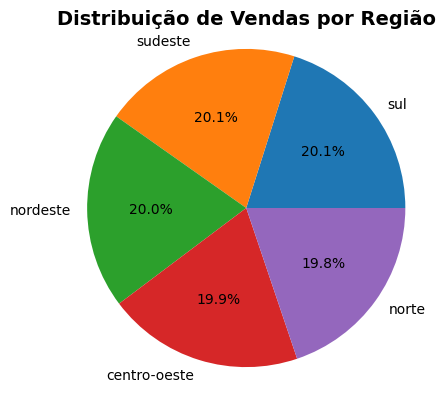

In [0]:
# Configuração do estilo
plt.figure(figsize=(15, 10))

# Análise 1: Distribuição de vendas por região
plt.subplot(2, 3, 1)
vendas_por_regiao = df_tudo['regiao'].value_counts()
plt.pie(vendas_por_regiao.values, labels=vendas_por_regiao.index, autopct='%1.1f%%')
plt.title('Distribuição de Vendas por Região', fontsize=14, fontweight='bold')
plt.axis('equal')

# Tabela complementar
print("=== TABELA 1: VENDAS POR REGIÃO ===")
print(vendas_por_regiao)
print(f"\nTotal de vendas: {vendas_por_regiao.sum()}")


=== TABELA 2: ESTATÍSTICAS POR CATEGORIA ===
                     mean  median     std     min      max
categoria_servico                                         
Consultoria        825.65  827.11  390.24  150.05  1500.00
Desenvolvimento    828.52  828.70  390.82  150.06  1500.00
Infraestrutura     823.81  823.19  390.76  150.02  1499.96


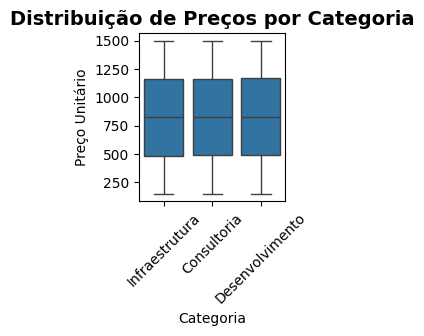

In [0]:
# Análise 2: Distribuição de preços por categoria
plt.subplot(2, 3, 2)
sns.boxplot(data=df_tudo, x='categoria_servico', y='preco_unitario')
plt.title('Distribuição de Preços por Categoria', fontsize=14, fontweight='bold')
plt.xlabel('Categoria')
plt.ylabel('Preço Unitário')
plt.xticks(rotation=45)

# Estatísticas por categoria
print("\n=== TABELA 2: ESTATÍSTICAS POR CATEGORIA ===")
stats_categoria = df_tudo.groupby('categoria_servico')['preco_unitario'].agg(['mean', 'median', 'std', 'min', 'max'])
print(stats_categoria.round(2))


=== TABELA 3: MATRIZ DE CORRELAÇÃO ===
                   preco_unitario  custo  lucro  margem_percentual  eficiencia
preco_unitario              1.000  0.933  0.589              0.000      -0.001
custo                       0.933  1.000  0.544             -0.042      -0.095
lucro                       0.589  0.544  1.000              0.508       0.692
margem_percentual           0.000 -0.042  0.508              1.000       0.673
eficiencia                 -0.001 -0.095  0.692              0.673       1.000


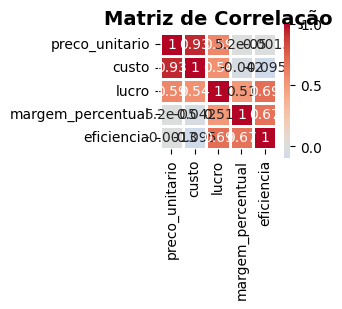

In [0]:
# Análise 3: Matriz de correlação
plt.subplot(2, 3, 3)
variaveis_numericas = ['preco_unitario', 'custo', 'lucro', 'margem_percentual', 'eficiencia']
matriz_correlacao = df_tudo[variaveis_numericas].corr()

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação', fontsize=14, fontweight='bold')

print("\n=== TABELA 3: MATRIZ DE CORRELAÇÃO ===")
print(matriz_correlacao.round(3))


=== TABELA 4: ANÁLISE DE OUTLIERS ===
Limite inferior: R$ -11061.98
Limite superior: R$ 25954.66
Quantidade de outliers: 2096
Percentual de outliers: 0.90%

Estatísticas dos outliers:
count     2096.000000
mean     27182.228130
std        822.616624
min      25956.270000
25%      26502.710000
50%      27041.800000
75%      27745.395000
max      29226.350000
Name: lucro, dtype: float64


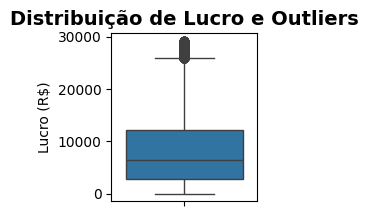

In [0]:
# Análise 4: Identificação de outliers
plt.subplot(2, 3, 4)
sns.boxplot(data=df_tudo, y='lucro')
plt.title('Distribuição de Lucro e Outliers', fontsize=14, fontweight='bold')
plt.ylabel('Lucro (R$)')

# Identificando outliers estatisticamente
Q1 = df_tudo['lucro'].quantile(0.25)
Q3 = df_tudo['lucro'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_tudo[(df_tudo['lucro'] < limite_inferior) | (df_tudo['lucro'] > limite_superior)]

print("\n=== TABELA 4: ANÁLISE DE OUTLIERS ===")
print(f"Limite inferior: R$ {limite_inferior:.2f}")
print(f"Limite superior: R$ {limite_superior:.2f}")
print(f"Quantidade de outliers: {len(outliers)}")
print(f"Percentual de outliers: {(len(outliers)/len(df_tudo))*100:.2f}%")
print("\nEstatísticas dos outliers:")
print(outliers['lucro'].describe())


=== TABELA 5: TENDÊNCIA TEMPORAL ===
mes
1     19632
2     18026
3     20178
4     19010
5     19758
6     19334
7     19710
8     19952
9     19362
10    19962
11    19382
12    19864
Name: Id, dtype: int64

Crescimento do primeiro ao último mês: 1.18%


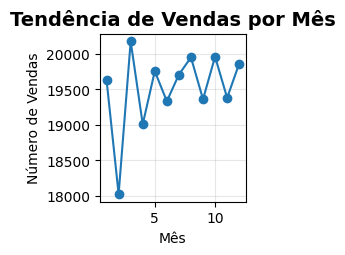

In [0]:
# Análise 5: Tendência temporal
plt.subplot(2, 3, 5)
vendas_por_mes = df_tudo.groupby('mes')['Id'].count()
vendas_por_mes.plot(kind='line', marker='o')
plt.title('Tendência de Vendas por Mês', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.grid(True, alpha=0.3)

# Cálculo de crescimento
crescimento = ((vendas_por_mes.iloc[-1] - vendas_por_mes.iloc[0]) / vendas_por_mes.iloc[0]) * 100

print("\n=== TABELA 5: TENDÊNCIA TEMPORAL ===")
print(vendas_por_mes)
print(f"\nCrescimento do primeiro ao último mês: {crescimento:.2f}%")

In [0]:
# Gerando relatório resumido
print("="*80)
print("RELATÓRIO DE ANÁLISE EXPLORATÓRIA - VENDAS B2B")
print("="*80)

print("\n1. DISTRIBUIÇÃO GEOGRÁFICA:")
print(f"   - Região com mais vendas: {vendas_por_regiao.idxmax()} ({vendas_por_regiao.max()} vendas)")
print(f"   - Região com menos vendas: {vendas_por_regiao.idxmin()} ({vendas_por_regiao.min()} vendas)")
print(f"   - Distribuição relativamente equilibrada entre regiões")

print("\n2. ANÁLISE DE PREÇOS:")
print(f"   - Categoria com maior preço médio: {stats_categoria['mean'].idxmax()} (R${stats_categoria['mean'].max():.2f})")
print(f"   - Categoria com menor preço médio: {stats_categoria['mean'].idxmin()} (R${stats_categoria['mean'].min():.2f})")
print(f"   - Maior variação de preços na categoria: {stats_categoria['std'].idxmax()}")

print("\n3. CORRELAÇÕES:")
print(f"   - Correlação mais forte: Preço x Lucro ({matriz_correlacao.loc['preco_unitario', 'lucro']:.3f})")
print(f"   - Correlação negativa mais forte: Custo x Margem ({matriz_correlacao.loc['custo', 'margem_percentual']:.3f})")

print("\n4. IDENTIFICAÇÃO DE ANOMALIAS:")
print(f"   - {len(outliers)} outliers identificados no lucro ({len(outliers)/len(df_tudo)*100:.1f}% do total)")
print(f"   - Lucro máximo outlier: R${outliers['lucro'].max():.2f}")
print(f"   - Lucro mínimo outlier: R${outliers['lucro'].min():.2f}")

print("\n5. TENDÊNCIA TEMPORAL:")
print(f"   - Crescimento no período: {crescimento:.2f}%")
print(f"   - Mês com maior volume: {vendas_por_mes.idxmax()} ({vendas_por_mes.max()} vendas)")
print(f"   - Mês com menor volume: {vendas_por_mes.idxmin()} ({vendas_por_mes.min()} vendas)")

print("\n6. DESEMPENHO POR EQUIPE:")
print(f"   - Equipe mais eficiente: {eficiencia_equipe.idxmax()} ({eficiencia_equipe.max():.3f})")
print(f"   - Equipe menos eficiente: {eficiencia_equipe.idxmin()} ({eficiencia_equipe.min():.3f})")

print("\n7. MARGEM E LUCRO:")
media_margem = df_tudo['margem_percentual'].mean()
media_lucro = df_tudo['lucro'].mean()
print(f"   - Margem média: {media_margem:.2f}%")
print(f"   - Lucro médio por venda: R${media_lucro:.2f}")
print(f"   - Lucro total estimado: R${df_tudo['lucro'].sum():.2f}")

print("\n" + "="*80)
print("RECOMENDAÇÕES:")
print("="*80)
print("1. Focar nas regiões de maior volume para expansão")
print("2. Investigar outliers para entender vendas excepcionais")
print("3. Analisar sazonalidade para planejamento de equipes")
print("4. Estudar práticas da equipe mais eficiente para replicação")
print("5. Monitorar categorias com maior margem para promoção")

RELATÓRIO DE ANÁLISE EXPLORATÓRIA - VENDAS B2B

1. DISTRIBUIÇÃO GEOGRÁFICA:
   - Região com mais vendas: sul (47102 vendas)
   - Região com menos vendas: norte (46406 vendas)
   - Distribuição relativamente equilibrada entre regiões

2. ANÁLISE DE PREÇOS:
   - Categoria com maior preço médio: Desenvolvimento (R$828.52)
   - Categoria com menor preço médio: Infraestrutura (R$823.81)
   - Maior variação de preços na categoria: Desenvolvimento

3. CORRELAÇÕES:
   - Correlação mais forte: Preço x Lucro (0.589)
   - Correlação negativa mais forte: Custo x Margem (-0.042)

4. IDENTIFICAÇÃO DE ANOMALIAS:
   - 2096 outliers identificados no lucro (0.9% do total)
   - Lucro máximo outlier: R$29226.35
   - Lucro mínimo outlier: R$25956.27

5. TENDÊNCIA TEMPORAL:
   - Crescimento no período: 1.18%
   - Mês com maior volume: 3 (20178 vendas)
   - Mês com menor volume: 2 (18026 vendas)

6. DESEMPENHO POR EQUIPE:
   - Equipe mais eficiente: Equipe Nebula (14.475)
   - Equipe menos eficiente: Equipe 

In [0]:
# Salvando o dataset limpo para uso futuro
df_tudo.to_csv('/Workspace/Users/gabriel07arthur@gmail.com/projeto_ebac/projeto_vendas/arquivos_vendas/vendas_teste.csv', index=False)
print("\nDataset limpo salvo como 'vendas_teste.csv'")


Dataset limpo salvo como 'vendas_teste.csv'
